## Content

Forest cover in general refers to the relative (in percent) or sure (in square kilometres/square miles) land area that is covered by forests.
According to the Food and Agriculture Organization, a forest is defined as land spanning more than 0.5 hectares with trees higher than 5 meters and a canopy cover of more than 10 percent, or trees able to reach these thresholds in situ. It does not include land that is predominantly under agricultural or urban land use. Forest cover is one category of terrestrial land cover. Land cover is the observed physical features, both natural and manmade, that occupy the earth’s immediate surface ... forest cover is defined as 25% or greater canopy closure at the Landsat pixel scale (30-m × 30-m spatial resolution) for trees >5 m in height. 

## Objective

Build a machine learning model to predict the forest cover type.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px


In [2]:
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.express as px

In [3]:
df = pd.read_csv('Train_data.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


## Data Description

<b>Elevation</b>: Elevation in meters

<b>Aspect</b>: Aspect in degrees azimuth

<b>Slope</b>: Slope in degrees

<b>Horizontal_Distance_To_Hydrology</b>: Horz Dist to nearest surface water features

<b>Vertical_Distance_To_Hydrology</b>: Vert Dist to nearest surface water features

<b>Horizontal_Distance_To_Roadways</b>: Horz Dist to nearest roadway

<b>Hillshade_9am</b>: Hillshade index at 9am, summer solstice

<b>Hillshade_Noon</b>: Hillshade index at noon, summer soltice

<b>Hillshade_3pm</b>: Hillshade index at 3pm, summer solstice

<b>Horizontal_Distance_To_Fire_Points</b>: Horz Dist to nearest wildfire ignition points

<b>Wilderness_Area (4 binary columns)</b>: Wilderness area designation

<b>Soil_Type (40 binary columns)</b>: Soil Type designation

<b>Cover_Type (7 types)</b>: Forest Cover Type designation

In [4]:
names={
    
'Elevation': 'Elevation in meters',

'Aspect': 'Aspect in degrees azimuth',

'Slope': 'Slope in degrees',

'Horizontal_Distance_To_Hydrology': 'Horz Dist to nearest surface water features',

'Vertical_Distance_To_Hydrology': 'Vert Dist to nearest surface water features',

'Horizontal_Distance_To_Roadways': 'Horz Dist to nearest roadway',

'Hillshade_9am': 'Hillshade index at 9am, summer solstice',

'Hillshade_Noon': 'Hillshade index at noon, summer soltice',

'Hillshade_3pm': 'Hillshade index at 3pm, summer solstice',

'Horizontal_Distance_To_Fire_Points': 'Horz Dist to nearest wildfire ignition points'
}

In [5]:
column_names=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

In [6]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2748.505160,156.212172,16.331052,228.094032,50.897820,1719.966576,212.370488,218.510700,134.502764,1521.756904,...,0.041580,0.039880,0.001500,0.006464,0.000396,0.001852,0.046020,0.041388,0.026892,4.000320
std,418.300975,109.652847,8.317490,209.630153,61.006967,1330.817603,30.654582,22.680947,46.033892,1107.378373,...,0.199628,0.195678,0.038701,0.080139,0.019896,0.042995,0.209529,0.199186,0.161768,2.001108
min,1859.000000,0.000000,0.000000,0.000000,-163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2375.000000,65.000000,10.000000,66.000000,5.000000,756.000000,195.000000,206.000000,106.000000,734.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2753.000000,125.000000,15.000000,180.000000,32.000000,1318.000000,220.000000,222.000000,137.000000,1273.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3108.000000,260.000000,22.000000,330.000000,79.000000,2294.000000,235.000000,235.000000,167.000000,1998.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3857.000000,360.000000,65.000000,1390.000000,598.000000,7112.000000,254.000000,254.000000,252.000000,7150.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
df['Cover_Type'].value_counts()

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

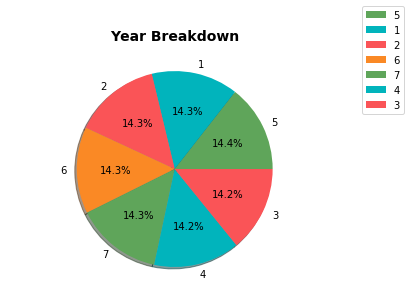

In [10]:
labels='5','1','2','6','7','4','3'
sizes=list(df['Cover_Type'].value_counts())
colors=['#5fa55a','#01b4bc','#fa5457', '#fa8925']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Year Breakdown',y=1.0, pad=20,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.2, 1))
plt.show()

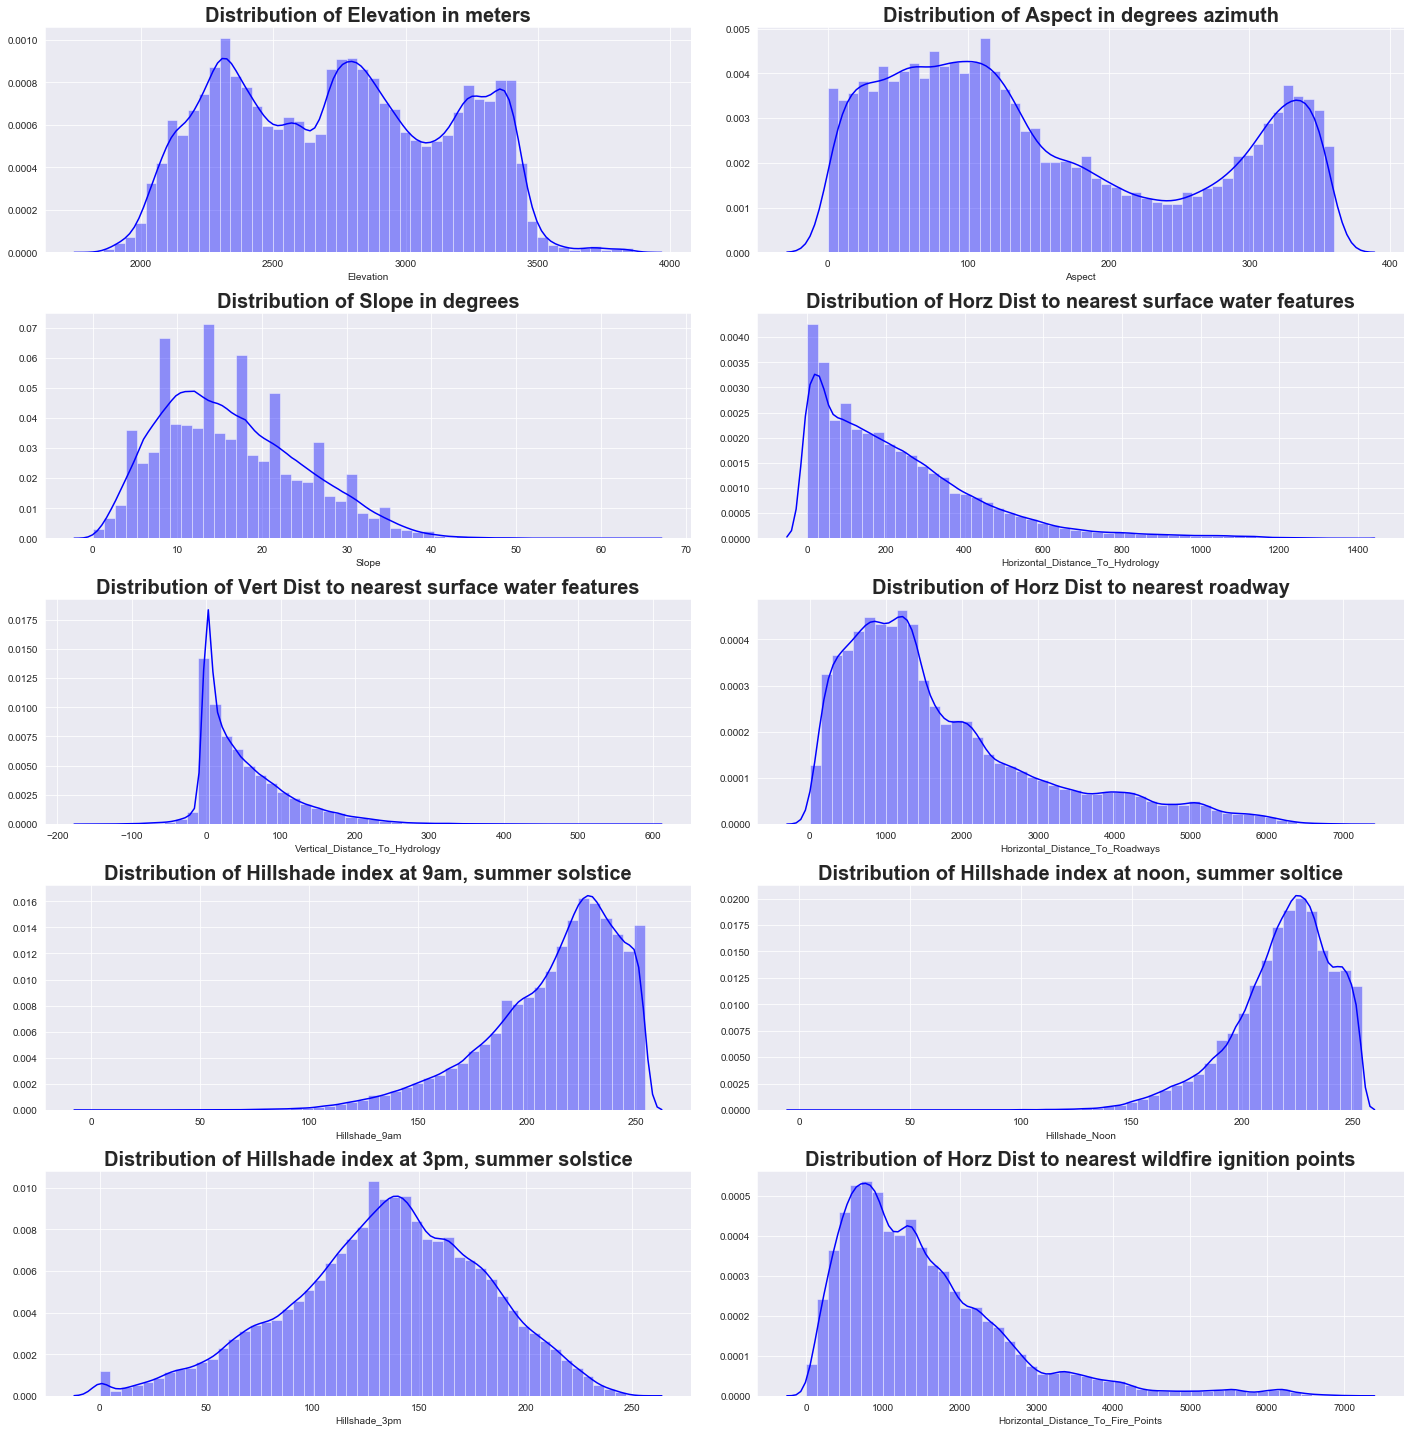

In [11]:
i=0
sns.set_style('darkgrid')
f, axs = plt.subplots(5,2,figsize=(20,20))
for column_name in column_names:
    # Set up the plot
    ax = plt.subplot(5, 2, i + 1)
    
    # Draw the plot
    sns.distplot(df[column_name],color = 'blue')
    
    # Title and labels
    ax.set_title('Distribution of %s' % names[column_name],size=20,fontweight='bold')
    i=i+1
    

plt.tight_layout()
plt.show()

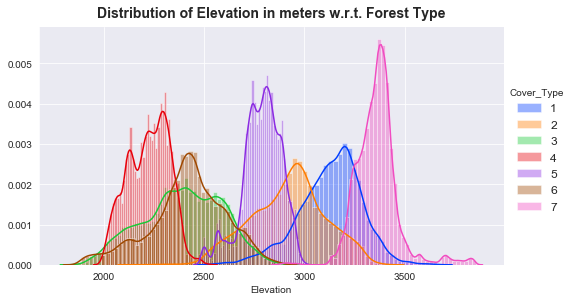

In [12]:
i=0
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

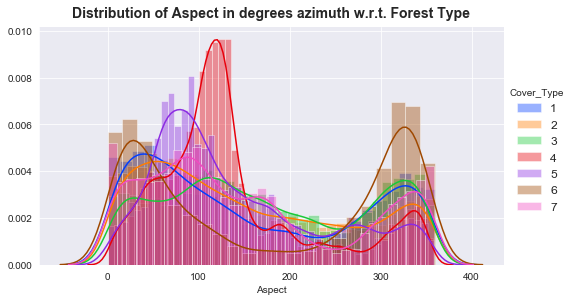

In [13]:
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

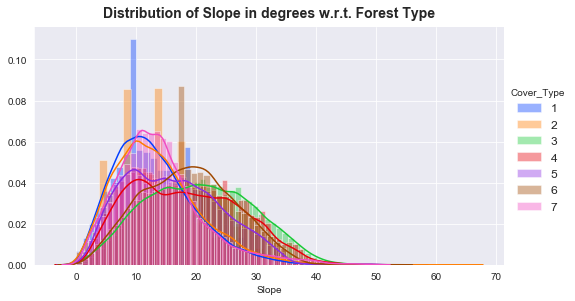

In [14]:
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

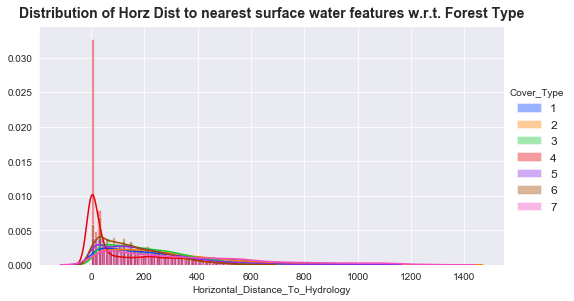

In [15]:
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

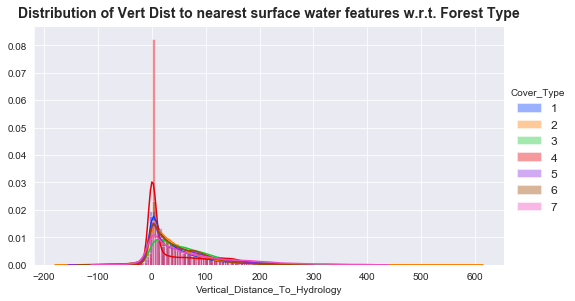

In [16]:
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

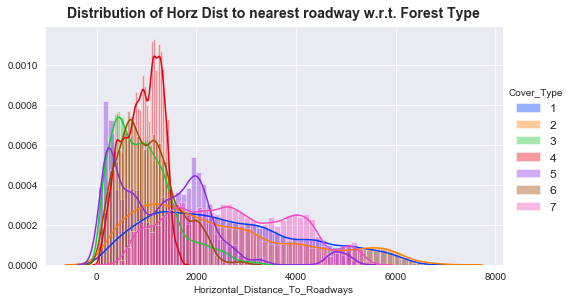

In [17]:
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

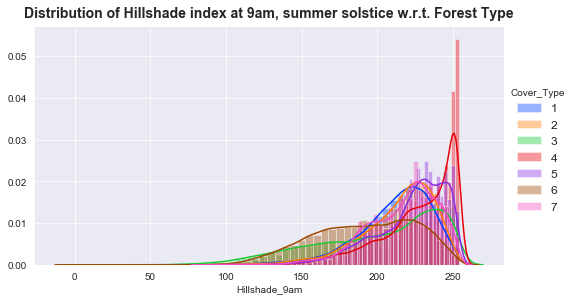

In [18]:
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

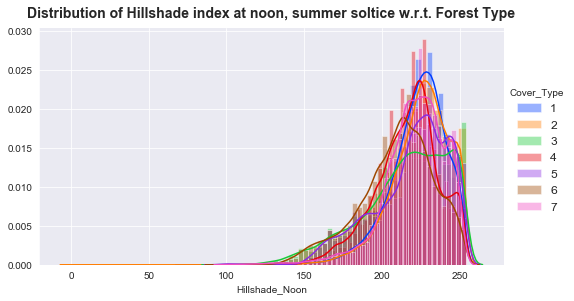

In [19]:
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

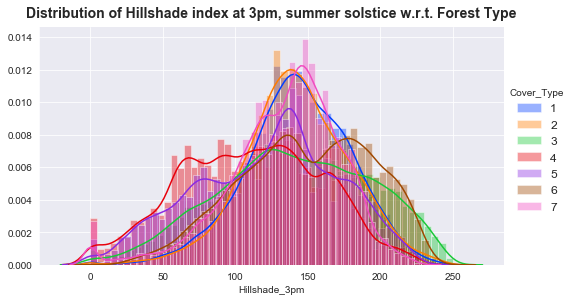

In [20]:
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

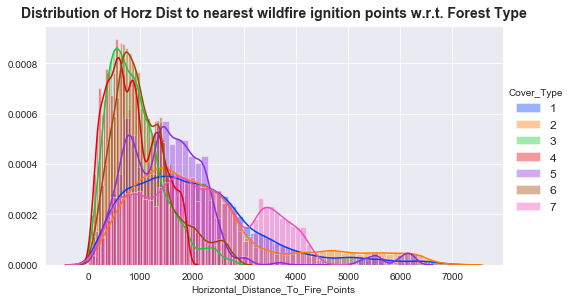

In [21]:
a=sns.FacetGrid(df,palette='bright',hue='Cover_Type',aspect=9/5,height=4)
a.map(sns.distplot,column_names[i])
plt.title('Distribution of %s w.r.t. Forest Type'%names[column_names[i]],y=1.0, pad=10,fontsize=14,fontweight='bold')
a.add_legend(fontsize=12)
i+=1

In [22]:
soil_type=['Soil_Type_%s'%i for i in range(1,41)]
soil_type

['Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_40']

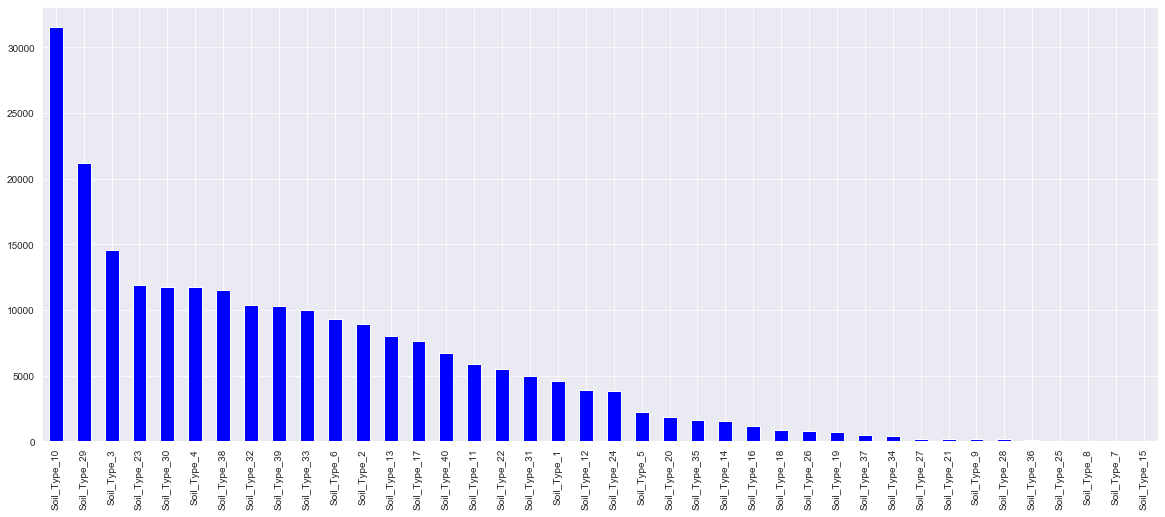

In [23]:
soil_counts=[]
for i in range(1,41):
    soil_counts.append(df['Soil_Type_%s'%i].value_counts()[1])
soil_counts=pd.Series(soil_counts)
soil_counts.index=soil_type
soil_counts.sort_values(ascending=False)
soil_counts.sort_values(ascending=False).plot.bar(figsize=(20, 8),color='b')

In [24]:
wilderness_area=['Wilderness_Area_%s'%i for i in range(1,5)]
wilderness_area

['Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Wilderness_Area_4']

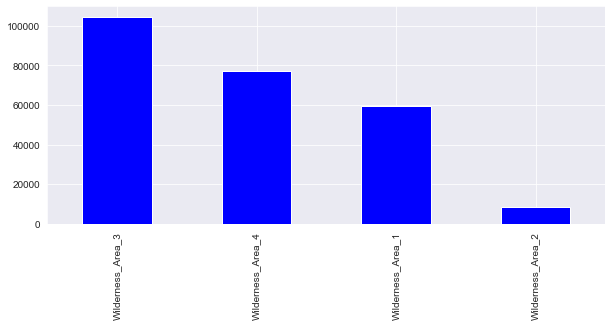

In [25]:
wild_counts=[]
for i in range(1,5):
    wild_counts.append(df['Wilderness_Area_%s'%i].value_counts()[1])
wild_counts=pd.Series(wild_counts)
wild_counts.index=wilderness_area
wild_counts.sort_values(ascending=False)
wild_counts.sort_values(ascending=False).plot.bar(figsize=(10, 4),color='b')

In [154]:
df1=df.copy()

In [27]:
df.shape

(250000, 55)

In [155]:
df1['Soil_type']=np.zeros((250000))
df1['Soil_type']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
249995    0.0
249996    0.0
249997    0.0
249998    0.0
249999    0.0
Name: Soil_type, Length: 250000, dtype: float64

In [156]:
for i in range(1,41):
    df1['Soil_type']=np.where(df1['Soil_Type_%s'%i]==1,'Soil_Type_%s'%i,df1['Soil_type'])
df1['Soil_type']

0         Soil_Type_10
1         Soil_Type_38
2         Soil_Type_38
3         Soil_Type_13
4         Soil_Type_31
              ...     
249995    Soil_Type_10
249996    Soil_Type_13
249997     Soil_Type_6
249998             0.0
249999    Soil_Type_40
Name: Soil_type, Length: 250000, dtype: object

In [157]:
df1['Soil_type'].value_counts()

Soil_Type_10    31533
0.0             23063
Soil_Type_29    21182
Soil_Type_3     14594
Soil_Type_23    11890
Soil_Type_30    11738
Soil_Type_4     11730
Soil_Type_38    11505
Soil_Type_32    10395
Soil_Type_39    10347
Soil_Type_33     9970
Soil_Type_6      9349
Soil_Type_2      8966
Soil_Type_13     8017
Soil_Type_17     7633
Soil_Type_40     6723
Soil_Type_11     5901
Soil_Type_22     5501
Soil_Type_31     4997
Soil_Type_1      4586
Soil_Type_12     3934
Soil_Type_24     3850
Soil_Type_5      2259
Soil_Type_20     1895
Soil_Type_35     1616
Soil_Type_14     1577
Soil_Type_16     1151
Soil_Type_18      879
Soil_Type_26      797
Soil_Type_19      717
Soil_Type_37      463
Soil_Type_34      375
Soil_Type_27      211
Soil_Type_21      157
Soil_Type_9       153
Soil_Type_28      150
Soil_Type_36       99
Soil_Type_25       58
Soil_Type_8        23
Soil_Type_7        15
Soil_Type_15        1
Name: Soil_type, dtype: int64

In [31]:
df.iloc[249998]

Elevation                             2563
Aspect                                 181
Slope                                   10
Horizontal_Distance_To_Hydrology         0
Vertical_Distance_To_Hydrology           0
Horizontal_Distance_To_Roadways       1349
Hillshade_9am                          223
Hillshade_Noon                         246
Hillshade_3pm                          156
Horizontal_Distance_To_Fire_Points    1007
Wilderness_Area_1                        0
Wilderness_Area_2                        0
Wilderness_Area_3                        1
Wilderness_Area_4                        0
Soil_Type_1                              0
Soil_Type_2                              0
Soil_Type_3                              0
Soil_Type_4                              0
Soil_Type_5                              0
Soil_Type_6                              0
Soil_Type_7                              0
Soil_Type_8                              0
Soil_Type_9                              0
Soil_Type_1

In [158]:
df1['Soil_type']=np.where(df1['Soil_type']=='0.0',np.nan,df1['Soil_type'])
df1['Soil_type'].isnull().sum()

23063

In [159]:
df1['Wilderness_Area']=np.zeros((250000))
for i in range(1,5):
    df1['Wilderness_Area']=np.where(df1['Wilderness_Area_%s'%i]==1,'Wilderness_Area_%s'%i,df1['Wilderness_Area'])
df1['Wilderness_Area']

0         Wilderness_Area_3
1         Wilderness_Area_1
2         Wilderness_Area_1
3         Wilderness_Area_3
4         Wilderness_Area_3
                ...        
249995    Wilderness_Area_4
249996    Wilderness_Area_3
249997    Wilderness_Area_4
249998    Wilderness_Area_3
249999    Wilderness_Area_3
Name: Wilderness_Area, Length: 250000, dtype: object

In [160]:
df1['Wilderness_Area'].value_counts()

Wilderness_Area_3    104456
Wilderness_Area_4     77173
Wilderness_Area_1     59575
Wilderness_Area_2      8340
0.0                     456
Name: Wilderness_Area, dtype: int64

In [161]:
df1['Wilderness_Area']=np.where(df1['Wilderness_Area']=='0.0',np.nan,df1['Wilderness_Area'])
df1['Wilderness_Area'].isnull().sum()

456

In [162]:
df1=df1.drop(soil_type,axis=1)
df1=df1.drop(wilderness_area,axis=1)
df1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_type,Wilderness_Area
0,2696.0,123.0,10.0,212.0,48.0,2245.0,237.0,231.0,123.0,2113.0,6,Soil_Type_10,Wilderness_Area_3
1,3269.0,110.0,19.0,134.0,40.0,3734.0,249.0,216.0,88.0,3894.0,1,Soil_Type_38,Wilderness_Area_1
2,3283.0,322.0,18.0,346.0,104.0,4369.0,170.0,217.0,185.0,1330.0,7,Soil_Type_38,Wilderness_Area_1
3,2847.0,89.0,31.0,270.0,175.0,1320.0,248.0,173.0,29.0,889.0,5,Soil_Type_13,Wilderness_Area_3
4,3248.0,93.0,12.0,507.0,118.0,570.0,239.0,221.0,110.0,945.0,7,Soil_Type_31,Wilderness_Area_3


In [37]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

Text(0.5, 1.0, 'Boxplot of Elevation in meters before removal of outliers')

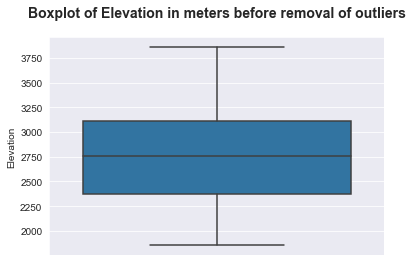

In [38]:
i=0
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

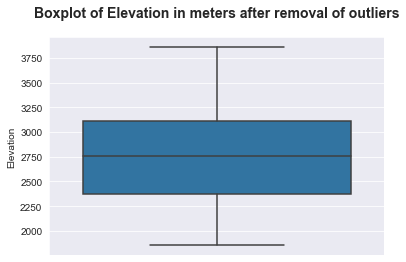

In [39]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

Text(0.5, 1.0, 'Boxplot of Aspect in degrees azimuth before removal of outliers')

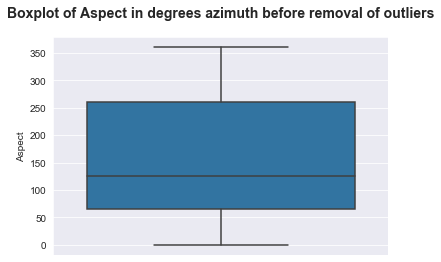

In [40]:
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

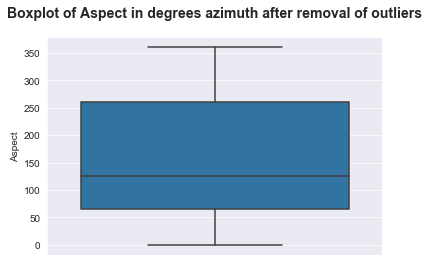

In [41]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

Text(0.5, 1.0, 'Boxplot of Slope in degrees before removal of outliers')

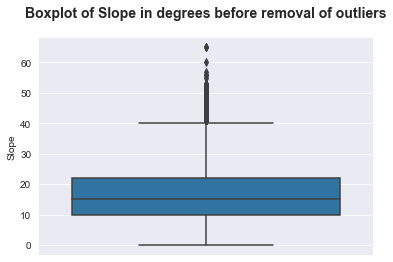

In [42]:
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

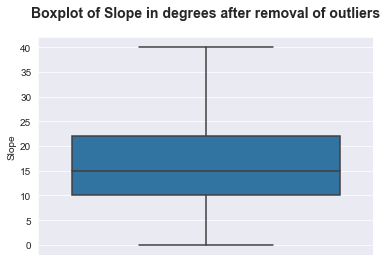

In [43]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

Text(0.5, 1.0, 'Boxplot of Horz Dist to nearest surface water features before removal of outliers')

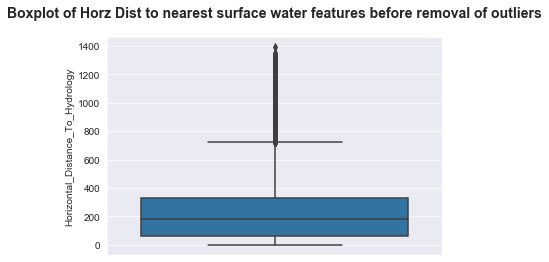

In [44]:
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

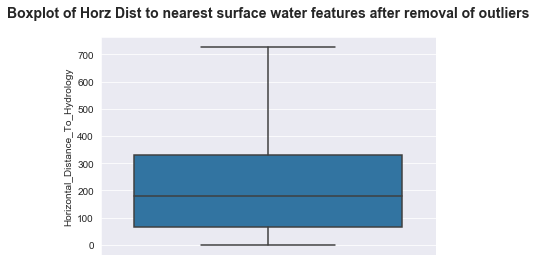

In [45]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

Text(0.5, 1.0, 'Boxplot of Vert Dist to nearest surface water features before removal of outliers')

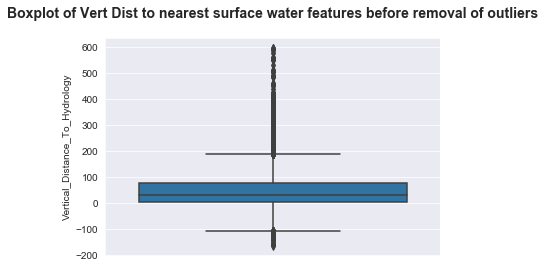

In [46]:
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

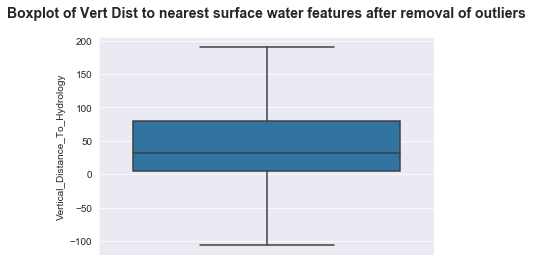

In [47]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

Text(0.5, 1.0, 'Boxplot of Horz Dist to nearest roadway before removal of outliers')

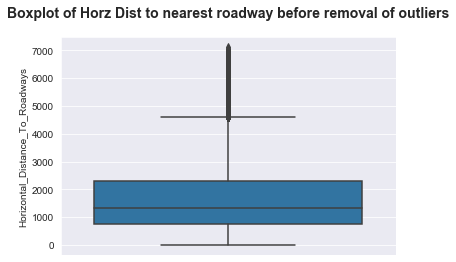

In [48]:
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

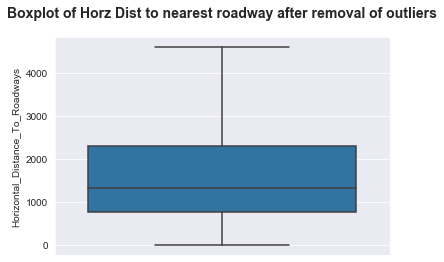

In [49]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

Text(0.5, 1.0, 'Boxplot of Hillshade index at 9am, summer solstice before removal of outliers')

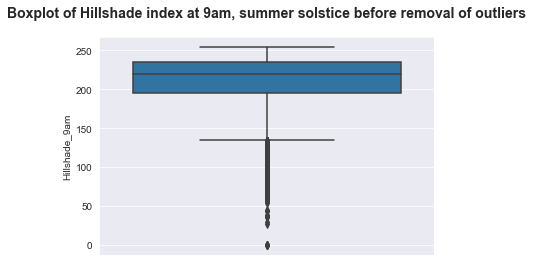

In [50]:
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

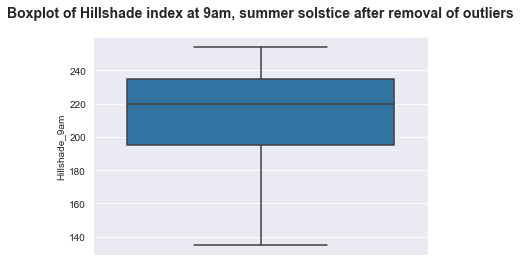

In [51]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

Text(0.5, 1.0, 'Boxplot of Hillshade index at noon, summer soltice before removal of outliers')

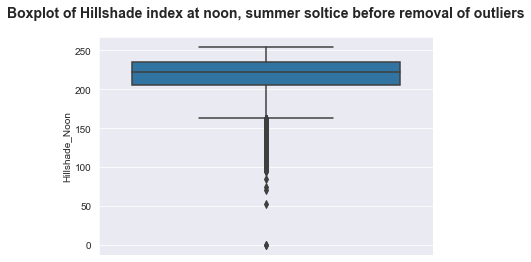

In [52]:
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

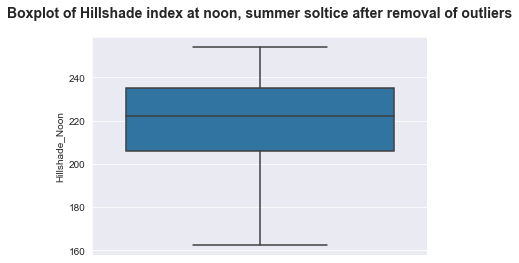

In [53]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

Text(0.5, 1.0, 'Boxplot of Hillshade index at 3pm, summer solstice before removal of outliers')

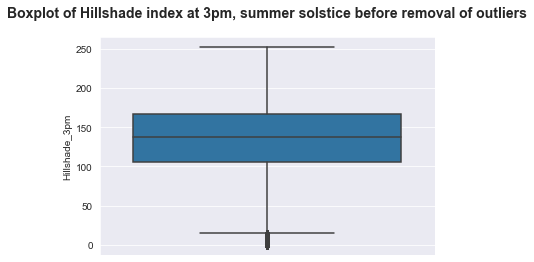

In [54]:
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

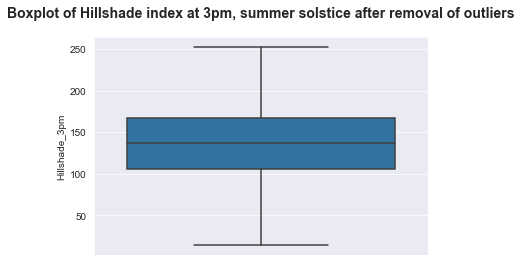

In [55]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

Text(0.5, 1.0, 'Boxplot of Horz Dist to nearest wildfire ignition points before removal of outliers')

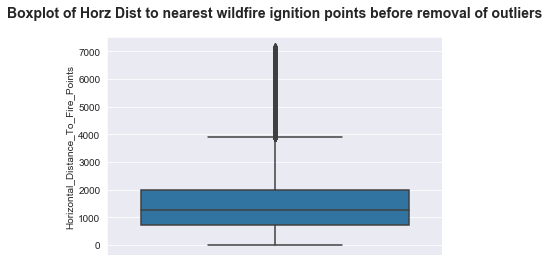

In [56]:
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')

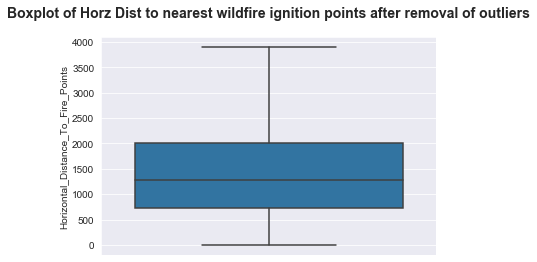

In [57]:
lower,upper=remove_outliers(df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]>upper,upper,df[column_names[i]])
df[column_names[i]]=np.where(df[column_names[i]]<lower,lower,df[column_names[i]])
sns.boxplot(y=column_names[i],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[column_names[i]],y=1.0, pad=20,fontsize=14,fontweight='bold')
i+=1

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [59]:
from sklearn.model_selection import train_test_split
X=df.drop('Cover_Type',axis=1)
y=df['Cover_Type']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=df['Cover_Type'])
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.95116


In [61]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.933


In [62]:
clf=GradientBoostingClassifier(random_state=42)
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.81644


In [63]:
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.96208


In [64]:
clf=XGBClassifier(random_state=42)
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

[19:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.92466


In [65]:
clf=LGBMClassifier(random_state=42)
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.91396


In [67]:
test = pd.read_csv('Test_data.csv')
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2157,345,11,0,0,1103,198,222,161,823,...,0,0,0,0,0,0,0,0,0,0
1,2740,40,23,94,-13,150,214,179,88,1307,...,0,0,0,0,0,0,0,0,0,0
2,2404,46,11,558,110,625,223,215,124,1051,...,0,0,0,0,0,0,0,0,0,0
3,3002,201,23,256,35,4582,204,253,173,1708,...,0,0,0,0,0,0,0,0,0,0
4,2360,306,6,136,57,1054,202,236,173,862,...,0,0,0,0,0,0,0,0,0,0


In [68]:
test.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [69]:
clf=RandomForestClassifier(random_state=42)
clf.fit(X,y)
clf.predict(test)

array([4, 5, 3, ..., 5, 3, 5], dtype=int64)

In [71]:
y_pred=clf.predict(test)

In [72]:
res = pd.DataFrame(y_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False) 

96.48% without scaling

In [74]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_train_norm=pd.DataFrame(X_train_norm, columns = df.drop('Cover_Type',axis=1).columns)
X_test_norm = norm.transform(X_test)
X_test_norm=pd.DataFrame(X_test_norm, columns = df.drop('Cover_Type',axis=1).columns)

In [77]:
[KNeighborsClassifier(),DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42),GradientBoostingClassifier(random_state=42),LGBMClassifier(random_state=42), XGBClassifier(random_state=42)]

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                    

In [76]:
clf = KNeighborsClassifier()
clf.fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

0.926

In [79]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

0.93296

In [80]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

0.962

In [81]:
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

0.81644

In [82]:
clf = LGBMClassifier(random_state=42)
clf.fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

0.91392

In [83]:
clf = XGBClassifier(random_state=42)
clf.fit(X_train_norm, y_train)
clf.score(X_test_norm, y_test)

[22:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.92464

In [85]:
clf=KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.94082

In [86]:
clf=KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9348

In [87]:
clf=KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.94864

In [88]:
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.95564

In [89]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9589

In [90]:
clf=KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.96266

In [91]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.96878

96.95

In [93]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

97.35

In [94]:
y_pred=clf.predict(test)
res = pd.DataFrame(y_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False) 

In [96]:
clf=KNeighborsClassifier()
clf.fit(X_train_norm,y_train)
clf.score(X_test_norm,y_test)

0.926

In [97]:
clf=KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train_norm,y_train)
clf.score(X_test_norm,y_test)

0.91506

In [98]:
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train_norm,y_train)
clf.score(X_test_norm,y_test)

0.93088

In [99]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_norm,y_train)
clf.score(X_test_norm,y_test)

0.93474

In [100]:
clf=KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train_norm,y_train)
clf.score(X_test_norm,y_test)

0.93848

In [101]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_norm,y_train)
clf.score(X_test_norm,y_test)

0.94874

In [102]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_train_std=pd.DataFrame(X_train_std, columns = df.drop('Cover_Type',axis=1).columns)
X_test_std = std.transform(X_test)
X_test_std=pd.DataFrame(X_test_std, columns = df.drop('Cover_Type',axis=1).columns)

In [103]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_std,y_train)
clf.score(X_test_std,y_test)

0.9482

In [104]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_std,y_train)
clf.score(X_test_std,y_test)

0.9621

In [106]:
X_train_std

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,-0.139671,-1.104637,-0.037885,1.735072,-1.284208,-0.847450,0.109234,-0.771191,-0.383250,-0.035589,...,-0.142784,-0.208628,-0.204496,-0.038824,-0.08123,-0.019239,-0.041989,-0.220048,-0.20851,-0.164525
1,1.246467,-0.383745,-0.037885,1.025345,1.065098,-0.100425,1.127543,0.146965,-0.776506,1.309656,...,-0.142784,-0.208628,-0.204496,-0.038824,-0.08123,-0.019239,-0.041989,-0.220048,-0.20851,-0.164525
2,-0.765822,-0.319869,-0.520748,-1.166925,-0.886633,-0.634245,0.957825,0.514228,-0.405098,-0.230748,...,-0.142784,-0.208628,-0.204496,-0.038824,-0.08123,-0.019239,-0.041989,-0.220048,-0.20851,-0.164525
3,0.431514,-0.748754,-0.400032,-0.693773,-0.651702,2.354665,0.754163,-0.174389,-0.558031,0.383952,...,-0.142784,-0.208628,-0.204496,-0.038824,-0.08123,-0.019239,-0.041989,-0.220048,-0.20851,-0.164525
4,1.083954,1.039788,-0.158601,-0.362567,-0.398700,0.763702,-1.180624,1.156937,1.517488,-0.348679,...,-0.142784,-0.208628,-0.204496,-0.038824,-0.08123,-0.019239,-0.041989,-0.220048,-0.20851,-0.164525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-1.059779,1.596426,1.893566,0.094813,2.022892,-0.433962,-2.640201,-1.689347,1.036841,-0.112817,...,-0.142784,-0.208628,-0.204496,-0.038824,-0.08123,-0.019239,-0.041989,-0.220048,-0.20851,-0.164525
199996,-0.263945,-0.931258,-0.520748,-0.168049,-0.416772,-0.795764,0.482614,-0.220297,-0.361403,-0.248490,...,-0.142784,-0.208628,-0.204496,-0.038824,-0.08123,-0.019239,-0.041989,-0.220048,-0.20851,-0.164525
199997,-0.251995,-0.876506,-0.037885,1.798159,-1.482995,1.025363,0.618389,-0.633467,-0.710964,1.359750,...,-0.142784,-0.208628,-0.204496,-0.038824,-0.08123,-0.019239,-0.041989,-0.220048,-0.20851,-0.164525
199998,0.388496,-0.146490,-0.641464,-0.052389,-0.452915,0.637717,0.822051,0.835582,-0.142927,1.079013,...,-0.142784,-0.208628,-0.204496,-0.038824,-0.08123,-0.019239,-0.041989,-0.220048,-0.20851,-0.164525


In [107]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.96878

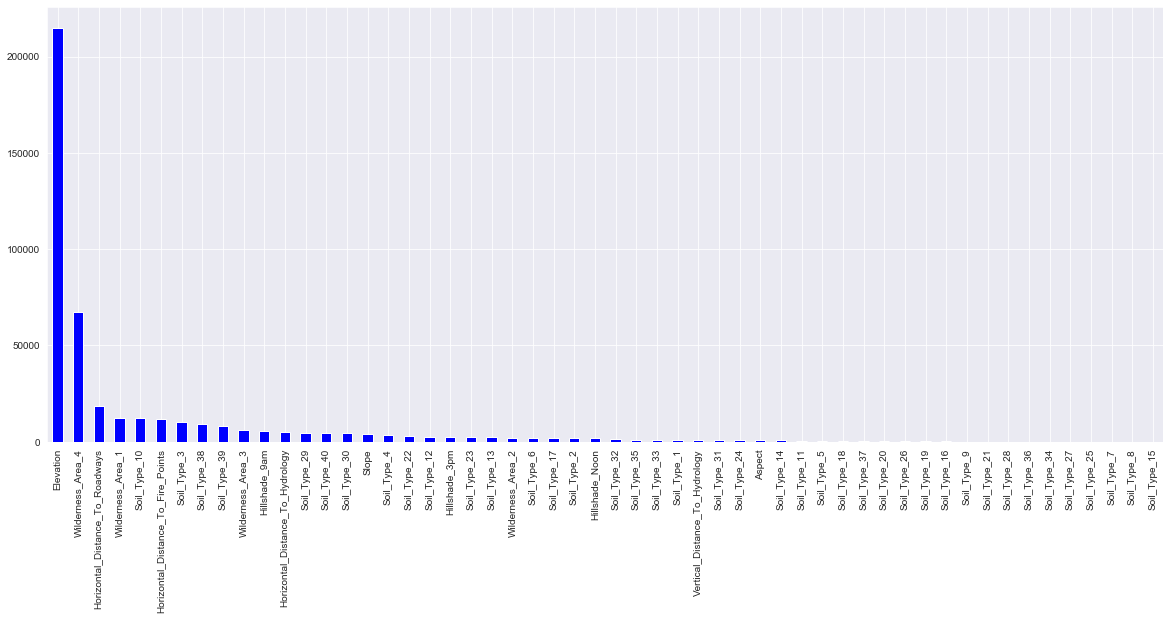

In [108]:
from sklearn.feature_selection import f_classif
f_score = f_classif(X_train, y_train)
f_stat=pd.Series(f_score[0])
f_stat.index=X_train.columns
f_stat.sort_values(ascending=False)
f_stat.sort_values(ascending=False).plot.bar(figsize=(20, 8),color='b')


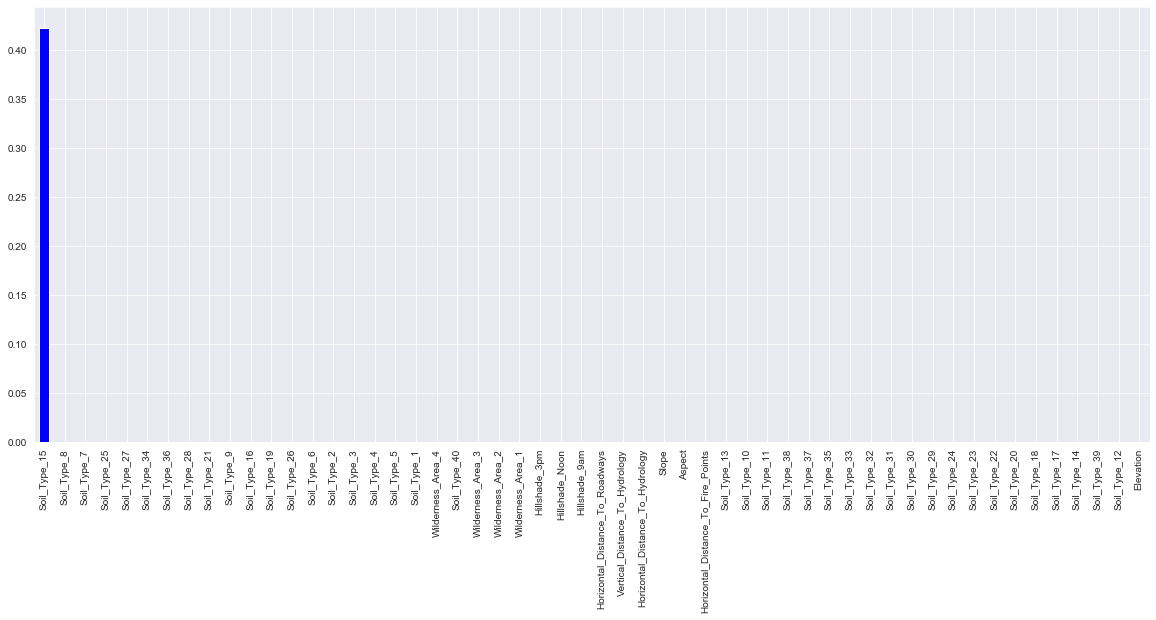

In [110]:
p_val=pd.Series(f_score[1])
p_val.index=X_train.columns
p_val.sort_values(ascending=False)
p_val.sort_values(ascending=False
                 ).plot.bar(figsize=(20, 8),color='b')
import plotly.express as px

fig = px.bar(p_val, height=400)
fig.show()

In [117]:
len(df.drop(columns = ['Cover_Type']).columns)

54

In [118]:
from sklearn.feature_selection import SelectKBest
column_names = df.drop(columns = ['Cover_Type']).columns
selector = SelectKBest(score_func=f_classif, k =53 )
X_train_transformed_filter = selector.fit_transform(X_train, y_train)
X_test_transformed_filter = selector.transform(X_test)
column_names[selector.get_support()]


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_16', 'Soil_Type_17',
       'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21',
       'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25',
       'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29',
       'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33',
       'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37',
       'Soil_Type_38', '

In [119]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_transformed_filter,y_train)
clf.score(X_test_transformed_filter,y_test)

0.96878

In [120]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_transformed_filter,y_train)
clf.score(X_test_transformed_filter,y_test)

0.96242

In [121]:
df1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_type,Wilderness_Area
0,2696,123,10,212,48,2245,237,231,123,2113,6,Soil_Type_10,Wilderness_Area_3
1,3269,110,19,134,40,3734,249,216,88,3960,1,Soil_Type_38,Wilderness_Area_1
2,3283,322,18,346,104,4369,170,217,185,1330,7,Soil_Type_38,Wilderness_Area_1
3,2847,89,31,270,175,1320,248,173,29,889,5,Soil_Type_13,Wilderness_Area_3
4,3248,93,12,507,118,570,239,221,110,945,7,Soil_Type_31,Wilderness_Area_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,3,Soil_Type_10,Wilderness_Area_4
249996,2872,90,31,251,147,2027,248,172,27,508,5,Soil_Type_13,Wilderness_Area_3
249997,2336,57,5,0,0,1429,224,228,139,387,4,Soil_Type_6,Wilderness_Area_4
249998,2563,181,10,0,0,1349,223,246,156,1007,5,NaN,Wilderness_Area_3


In [163]:
df1['Soil_type'] = df1['Soil_type'].fillna('Soil_Type_0')
df1['Wilderness_Area'] = df1['Wilderness_Area'].fillna('Wilderness_Area_0')
df1.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
Soil_type                             0
Wilderness_Area                       0
dtype: int64

In [164]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Soil_type'])
dfbin=encoder.fit_transform(df1['Soil_type'])
df2=pd.concat([df1, dfbin], axis=1)
df2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_type,Wilderness_Area,Soil_type_0,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6
0,2696.0,123.0,10.0,212.0,48.0,2245.0,237.0,231.0,123.0,2113.0,6,Soil_Type_10,Wilderness_Area_3,0,0,0,0,0,0,1
1,3269.0,110.0,19.0,134.0,40.0,3734.0,249.0,216.0,88.0,3894.0,1,Soil_Type_38,Wilderness_Area_1,0,0,0,0,0,1,0
2,3283.0,322.0,18.0,346.0,104.0,4369.0,170.0,217.0,185.0,1330.0,7,Soil_Type_38,Wilderness_Area_1,0,0,0,0,0,1,0
3,2847.0,89.0,31.0,270.0,175.0,1320.0,248.0,173.0,29.0,889.0,5,Soil_Type_13,Wilderness_Area_3,0,0,0,0,0,1,1
4,3248.0,93.0,12.0,507.0,118.0,570.0,239.0,221.0,110.0,945.0,7,Soil_Type_31,Wilderness_Area_3,0,0,0,0,1,0,0


In [165]:
encoder = ce.BinaryEncoder(cols=['Wilderness_Area'])
dfbin=encoder.fit_transform(df1['Wilderness_Area'])
df2=pd.concat([df2, dfbin], axis=1)
df2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3
0,2696.0,123.0,10.0,212.0,48.0,2245.0,237.0,231.0,123.0,2113.0,...,0,0,0,0,0,1,0,0,0,1
1,3269.0,110.0,19.0,134.0,40.0,3734.0,249.0,216.0,88.0,3894.0,...,0,0,0,0,1,0,0,0,1,0
2,3283.0,322.0,18.0,346.0,104.0,4369.0,170.0,217.0,185.0,1330.0,...,0,0,0,0,1,0,0,0,1,0
3,2847.0,89.0,31.0,270.0,175.0,1320.0,248.0,173.0,29.0,889.0,...,0,0,0,0,1,1,0,0,0,1
4,3248.0,93.0,12.0,507.0,118.0,570.0,239.0,221.0,110.0,945.0,...,0,0,0,1,0,0,0,0,0,1


In [166]:
df2=df2.drop(['Soil_type','Wilderness_Area'],axis=1)
df2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3
0,2696.0,123.0,10.0,212.0,48.0,2245.0,237.0,231.0,123.0,2113.0,...,0,0,0,0,0,1,0,0,0,1
1,3269.0,110.0,19.0,134.0,40.0,3734.0,249.0,216.0,88.0,3894.0,...,0,0,0,0,1,0,0,0,1,0
2,3283.0,322.0,18.0,346.0,104.0,4369.0,170.0,217.0,185.0,1330.0,...,0,0,0,0,1,0,0,0,1,0
3,2847.0,89.0,31.0,270.0,175.0,1320.0,248.0,173.0,29.0,889.0,...,0,0,0,0,1,1,0,0,0,1
4,3248.0,93.0,12.0,507.0,118.0,570.0,239.0,221.0,110.0,945.0,...,0,0,0,1,0,0,0,0,0,1


In [179]:
from sklearn.model_selection import train_test_split
X=df2.drop('Cover_Type',axis=1)
y=df2['Cover_Type']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=df2['Cover_Type'])

In [180]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.96876

In [135]:
len(test)

50000

In [136]:
test['Wilderness_Area']=np.zeros((50000))
for i in range(1,5):
    test['Wilderness_Area']=np.where(test['Wilderness_Area_%s'%i]==1,'Wilderness_Area_%s'%i,test['Wilderness_Area'])
test['Wilderness_Area']

0        Wilderness_Area_4
1        Wilderness_Area_1
2        Wilderness_Area_4
3        Wilderness_Area_1
4        Wilderness_Area_4
               ...        
49995    Wilderness_Area_3
49996    Wilderness_Area_1
49997    Wilderness_Area_3
49998    Wilderness_Area_3
49999    Wilderness_Area_3
Name: Wilderness_Area, Length: 50000, dtype: object

In [138]:
test['Wilderness_Area'].value_counts()


Wilderness_Area_3    20952
Wilderness_Area_4    15386
Wilderness_Area_1    11856
Wilderness_Area_2     1717
0.0                     89
Name: Wilderness_Area, dtype: int64

In [140]:
test['Wilderness_Area']=np.where(test['Wilderness_Area']=='0.0',np.nan,test['Wilderness_Area'])
test['Wilderness_Area'].isnull().sum()

89

In [ ]:
df1['Wilderness_Area'].isnull().sum()
df1=df1.drop(soil_type,axis=1)
df1=df1.drop(wilderness_area,axis=1)
df1.head()

In [150]:
test['Wilderness_Area'] = test['Wilderness_Area'].fillna('Wilderness_Area_0')

In [145]:
test['Soil_type']=np.zeros((50000))
for i in range(1,41):
    test['Soil_type']=np.where(test['Soil_Type_%s'%i]==1,'Soil_Type_%s'%i,test['Soil_type'])
test['Soil_type']

0        Soil_Type_17
1                 0.0
2         Soil_Type_3
3        Soil_Type_29
4        Soil_Type_10
             ...     
49995     Soil_Type_4
49996    Soil_Type_20
49997    Soil_Type_11
49998     Soil_Type_4
49999    Soil_Type_13
Name: Soil_type, Length: 50000, dtype: object

In [149]:
test['Soil_type'].value_counts()

Soil_Type_10    6276
Soil_Type_0     4645
Soil_Type_29    4201
Soil_Type_3     3016
Soil_Type_4     2374
Soil_Type_30    2366
Soil_Type_38    2333
Soil_Type_23    2312
Soil_Type_32    2114
Soil_Type_39    2073
Soil_Type_33    2001
Soil_Type_2     1802
Soil_Type_6     1771
Soil_Type_13    1624
Soil_Type_17    1514
Soil_Type_40    1381
Soil_Type_11    1242
Soil_Type_22    1095
Soil_Type_31     976
Soil_Type_1      882
Soil_Type_24     771
Soil_Type_12     756
Soil_Type_5      443
Soil_Type_20     382
Soil_Type_35     326
Soil_Type_14     301
Soil_Type_16     205
Soil_Type_18     171
Soil_Type_19     156
Soil_Type_26     147
Soil_Type_37      80
Soil_Type_34      72
Soil_Type_27      51
Soil_Type_21      36
Soil_Type_9       31
Soil_Type_36      27
Soil_Type_28      26
Soil_Type_25      15
Soil_Type_8        3
Soil_Type_7        2
Soil_Type_15       1
Name: Soil_type, dtype: int64

In [148]:
test['Soil_type']=np.where(test['Soil_type']=='0.0','Soil_Type_0',test['Soil_type'])
test['Soil_type'].isnull().sum()

0

In [143]:
at = pd.read_csv('Test_data.csv')
at.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,2157,345,11,0,0,1103,198,222,161,823,...,0,0,0,0,0,0,0,0,0,0
1,2740,40,23,94,-13,150,214,179,88,1307,...,0,0,0,0,0,0,0,0,0,0
2,2404,46,11,558,110,625,223,215,124,1051,...,0,0,0,0,0,0,0,0,0,0
3,3002,201,23,256,35,4582,204,253,173,1708,...,0,0,0,0,0,0,0,0,0,0
4,2360,306,6,136,57,1054,202,236,173,862,...,0,0,0,0,0,0,0,0,0,0


In [151]:
test.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [152]:
test=test.drop(soil_type,axis=1)
test=test.drop(wilderness_area,axis=1)
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_type
0,2157,345,11,0,0,1103,198,222,161,823,Wilderness_Area_4,Soil_Type_17
1,2740,40,23,94,-13,150,214,179,88,1307,Wilderness_Area_1,Soil_Type_0
2,2404,46,11,558,110,625,223,215,124,1051,Wilderness_Area_4,Soil_Type_3
3,3002,201,23,256,35,4582,204,253,173,1708,Wilderness_Area_1,Soil_Type_29
4,2360,306,6,136,57,1054,202,236,173,862,Wilderness_Area_4,Soil_Type_10


In [173]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Soil_type'])
dfbin=encoder.fit_transform(df1['Soil_type'])
testbin=encoder.transform(test['Soil_type'])
test_1=pd.concat([test, testbin], axis=1)
test_1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_type,Soil_type_0,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6
0,2157,345,11,0,0,1103,198,222,161,823,Wilderness_Area_4,Soil_Type_17,0,0,1,1,0,0,1
1,2740,40,23,94,-13,150,214,179,88,1307,Wilderness_Area_1,Soil_Type_0,0,0,0,0,1,1,1
2,2404,46,11,558,110,625,223,215,124,1051,Wilderness_Area_4,Soil_Type_3,0,0,0,1,0,0,1
3,3002,201,23,256,35,4582,204,253,173,1708,Wilderness_Area_1,Soil_Type_29,0,0,0,0,1,0,1
4,2360,306,6,136,57,1054,202,236,173,862,Wilderness_Area_4,Soil_Type_10,0,0,0,0,0,0,1


In [174]:
encoder = ce.BinaryEncoder(cols=['Wilderness_Area'])
dfbin=encoder.fit_transform(df1['Wilderness_Area'])
testbin=encoder.transform(test['Wilderness_Area'])
test_1=pd.concat([test_1, testbin], axis=1)
test_1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3
0,2157,345,11,0,0,1103,198,222,161,823,...,0,1,1,0,0,1,0,0,1,1
1,2740,40,23,94,-13,150,214,179,88,1307,...,0,0,0,1,1,1,0,0,1,0
2,2404,46,11,558,110,625,223,215,124,1051,...,0,0,1,0,0,1,0,0,1,1
3,3002,201,23,256,35,4582,204,253,173,1708,...,0,0,0,1,0,1,0,0,1,0
4,2360,306,6,136,57,1054,202,236,173,862,...,0,0,0,0,0,1,0,0,1,1


In [175]:
test_1=test_1.drop(['Soil_type','Wilderness_Area'],axis=1)
test_1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_type_1,Soil_type_2,Soil_type_3,Soil_type_4,Soil_type_5,Soil_type_6,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3
0,2157,345,11,0,0,1103,198,222,161,823,...,0,1,1,0,0,1,0,0,1,1
1,2740,40,23,94,-13,150,214,179,88,1307,...,0,0,0,1,1,1,0,0,1,0
2,2404,46,11,558,110,625,223,215,124,1051,...,0,0,1,0,0,1,0,0,1,1
3,3002,201,23,256,35,4582,204,253,173,1708,...,0,0,0,1,0,1,0,0,1,0
4,2360,306,6,136,57,1054,202,236,173,862,...,0,0,0,0,0,1,0,0,1,1


In [177]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [184]:
y_pred=clf.predict(test_1)
res = pd.DataFrame(y_pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False) 

In [181]:
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9642

In [183]:
clf=RandomForestClassifier(random_state=42)
clf.fit(X,y)
clf.score(X_test,y_test)

1.0